In [1]:
#Generate Data

from sklearn.datasets import make_classification
import numpy as np
x,y= make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False,class_sep=10)

In [17]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

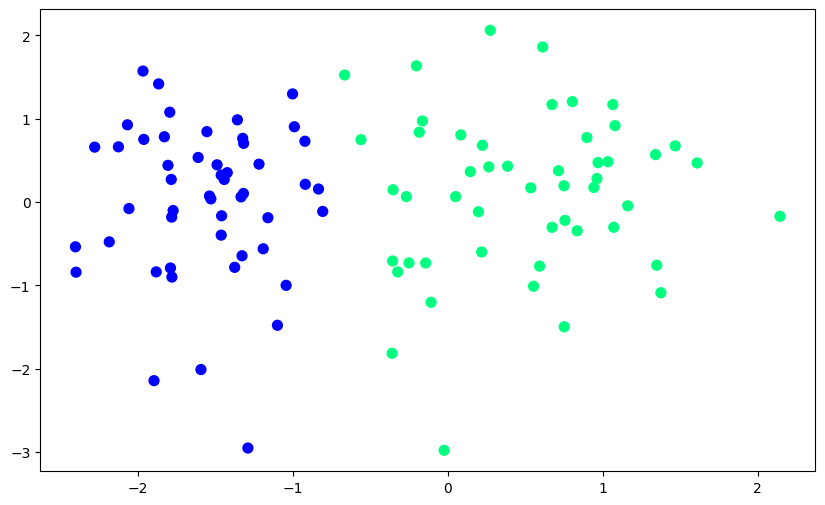

In [3]:
#Plot the features of dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)

In [5]:
def step(z):
    return 1 if z>0 else 0

In [4]:
#Train the model and get the coefficient and bias term

def perceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(10000):
        j = np.random.randint(0,100)
        y_hat=step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_hat)*x[j]

    return weights[0],weights[1:]

In [6]:
intercept,coeff=perceptron(x,y)

In [18]:
intercept,coeff

(0.9, array([1.33166961, 0.2331156 ]))

In [9]:
m=-(coeff[0]/coeff[1])
b=-(intercept/coeff[1])

In [10]:
m,b

(-5.712486102006728, -3.8607455185235158)

(-4.0, 2.0)

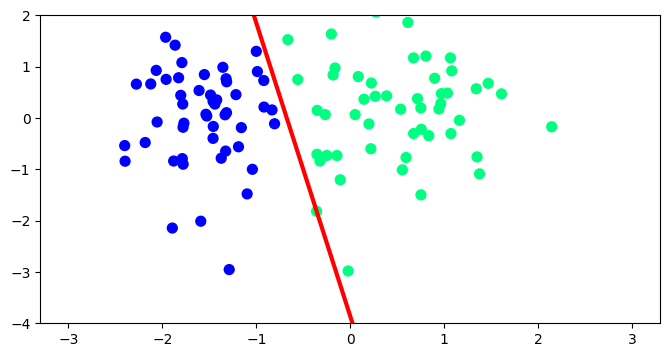

In [11]:
#Visualize the final decision boundary line

x_input=np.linspace(-3,3,100)
y_input=m*x_input+b
plt.figure(figsize=(8,4))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)
plt.ylim(-4,2)

# Alternative solution (Better)

In [12]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [13]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [14]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

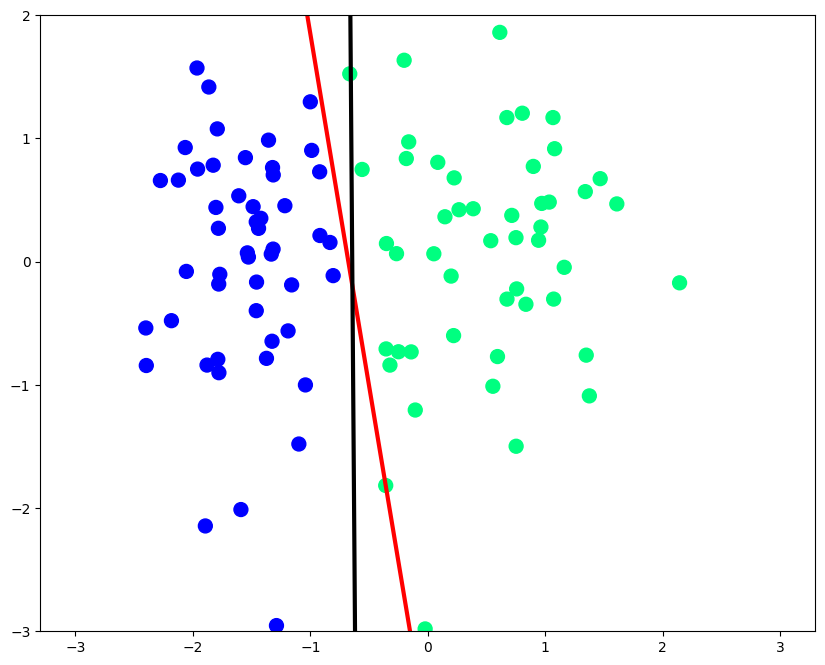

In [15]:
plt.figure(figsize=(10,8))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)